## Mini Project III

## Q1

## 1. a) create two separate customer segmentations (using clustering) to split them into 3-5 clusters: based on demographics (only on the information from twm_customer)

In [1]:
# import pandas 

import pandas as pd 

# import numpy 
import numpy as np 

# import matplotlib 
import matplotlib.pyplot as plt

# import kmeans 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df_accounts = pd.read_csv("twm_accounts.csv", delimiter = ";")
df_accounts

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28
...,...,...,...,...,...,...,...,...
1404,4561143213625560,1362556,CC,N,20.1.1992,19.8.1995,1433.94,20.00
1405,4561143213626240,1362624,CC,Y,29.11.1990,NaN,632.75,1400.00
1406,4561143213628750,1362875,CC,Y,24.2.1989,NaN,2810.91,3000.00
1407,13626543,1362654,SV,Y,17.10.1992,NaN,784.53,622.46


In [3]:
df_customer = pd.read_csv("twm_customer.csv", delimiter = ";")
df_customer

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL


In [4]:
df_income_age = df_customer[['income', 'age']]
df_income_age

,income,age
0,26150,46
1,6605,71
2,18548,38
3,47668,54
4,44554,59
...,...,...
742,14795,36
743,26387,56
744,61300,50
745,15100,37


In [13]:
X = df_customer.iloc[:, 1:3].values
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [14]:
km = KMeans(n_clusters = 3, 
            n_init = 10,
            random_state = 0)

In [15]:
y_km = km.fit_predict(X_sc)

In [16]:
def plot_clusters(X, y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res): 
        x = X[y_res == cluster, 0]
        y = X[y_res == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x, 
                    y,
                    s = 50,
                    marker = 's',
                    label = f'cluster {cluster}')
    
    if plt_cluster_centers:
        plt.scatter(X_centroids, 
                    Y_centroids, 
                    marker = '*', 
                    c = 'red', 
                    s = 250, 
                    label = 'centroids')
    plt.legend()
    plt.grid()
    plt.show()

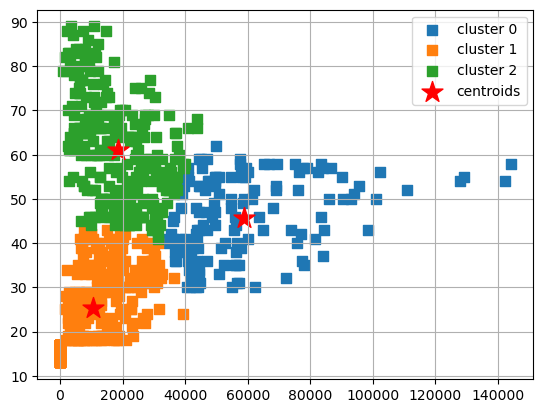

In [18]:
plot_clusters(X, y_km, plt_cluster_centers = True)

In [19]:
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

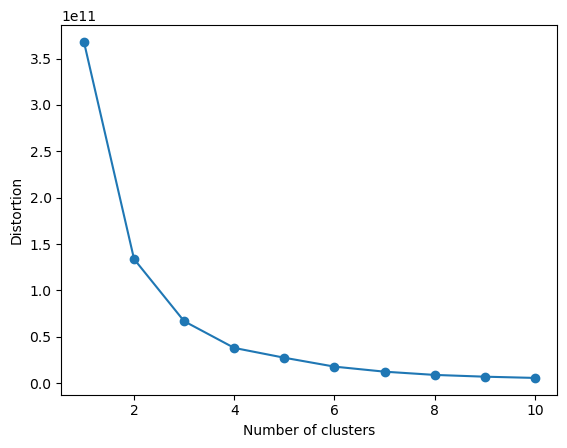

In [20]:
# elbow rule
plot_distortion(X,max_clusters=10)

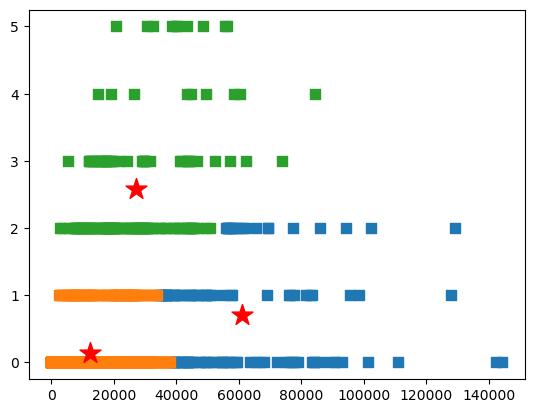

In [21]:
Z = df_customer.iloc[:, [1,4]].values
sc = StandardScaler()
Z_sc = sc.fit_transform(Z)


km_2 = KMeans(n_clusters = 3, 
            n_init = 10,
            random_state = 0)

y_km_2 = km_2.fit_predict(Z_sc)


def plot_clusters(Z, y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res): 
        x = Z[y_res == cluster, 0]
        y = Z[y_res == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x, 
                    y,
                    s = 50,
                    marker = 's',
                    label = f'cluster{cluster}')
    
    if plt_cluster_centers:
        plt.scatter(X_centroids, 
                    Y_centroids, 
                    marker = '*', 
                    c = 'red', 
                    s = 250, 
                    label = 'centroids')

plot_clusters(Z, y_km_2, plt_cluster_centers = True)

# Q3

#### visualize segmentations using scatter plot. We will have to use PCA to be able to plot our observations in 2D.

In [23]:
df_checking_acct = pd.read_csv("twm_checking_acct.csv", delimiter = ";")
df_checking_acct

,cust_id,acct_nbr,minimum_balance,per_check_fee,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1362548,13625482,3000,0.00,Y,11.11.1986,NaN,6004.34,569.65
1,1362487,13624872,3000,0.00,Y,12.1.1995,NaN,2781.07,1401.21
2,1363017,13630172,3000,0.00,Y,19.3.1994,NaN,2694.91,147.15
3,1362752,13627522,100,0.15,Y,8.1.1994,NaN,487.69,3.76
4,1363282,13632822,100,0.15,Y,5.3.1988,NaN,133.90,84.18
...,...,...,...,...,...,...,...,...,...
515,1363467,13634672,3000,0.00,Y,15.1.1995,NaN,4155.98,58.47
516,1362855,13628552,200,0.15,Y,2.9.1994,NaN,202.30,1070.87
517,1363324,13633242,3000,0.00,Y,25.8.1994,NaN,4010.41,2325.37
518,1362569,13625692,200,0.15,Y,6.4.1995,NaN,927.07,46.48


In [24]:
df_checking_tran = pd.read_csv("twm_checking_tran.csv", delimiter = ";")
df_checking_tran

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,-0.15,-0.15,0.0,58.99,29.1.1995,,,FK
1,1362784,90,-200.00,-200.00,0.0,1380.69,2.7.1995,53313,A,WD
2,1363088,46,0.00,0.00,0.0,128.35,26.3.1995,834,A,IQ
3,1363306,32,-40.32,-40.32,0.0,433.06,29.1.1995,,P,WD
4,1363251,11,-87.88,-87.88,0.0,1919.55,8.2.1995,,P,WD
...,...,...,...,...,...,...,...,...,...,...
46199,1363272,50,-0.15,-0.15,0.0,319.71,3.10.1995,,,FK
46200,1363393,61,-102.52,-102.52,0.0,57.47,22.1.1995,,P,WD
46201,1363365,25,-275.89,-275.89,0.0,2632.93,8.1.1995,,P,WD
46202,1363031,73,-0.15,-0.15,0.0,1103.47,23.1.1995,,,FK


In [25]:
df_credit_acct = pd.read_csv("twm_credit_acct.csv", delimiter = ";")
df_credit_acct

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00
...,...,...,...,...,...,...,...,...,...
463,1363364,4561143213633640,3000,0,N,23.11.1989,23.7.1995,1783.86,1785.97
464,1363467,4561143213634670,1500,0,Y,30.6.1993,NaN,1193.89,1500.00
465,1363263,4561143213632630,3000,0,Y,29.3.1995,NaN,0.00,1218.94
466,1362569,4561143213625690,9200,0,Y,6.12.1995,NaN,0.00,9200.00


In [26]:
df_credit_tran = pd.read_csv("twm_credit_tran.csv", delimiter = ";")
df_credit_tran

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363088,46,-121.49,-121.49,0.0,-141.00,20.10.1995,101144,E,CG
1,1363306,32,-220.64,-220.64,0.0,-520.13,13.10.1995,83115,E,CG
2,1362959,10,0.00,0.00,0.0,-3900.00,26.2.1995,84129,K,IQ
3,1363429,13,-195.27,-195.27,0.0,-1739.74,3.1.1995,191815,E,CG
4,1363393,14,-37.32,-37.32,0.0,-198.98,4.7.1995,100811,E,CG
...,...,...,...,...,...,...,...,...,...,...
20162,1363002,60,-94.52,-94.52,0.0,-3733.22,20.5.1995,224723,E,CG
20163,1362995,36,0.00,0.00,0.0,-2300.00,28.9.1995,142011,B,IQ
20164,1363196,39,-100.00,-100.00,0.0,-289.91,12.5.1995,152852,A,CA
20165,1363393,61,-63.04,-63.04,0.0,-736.70,16.10.1995,145535,E,CG


In [27]:
df_savings_acct = pd.read_csv("twm_savings_acct.csv", delimiter = ";")
df_savings_acct

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35
...,...,...,...,...,...,...,...,...,...
416,1363141,13631413,100,BS,Y,11.11.1994,NaN,177.33,528.57
417,1363038,13630383,100,BS,Y,20.2.1995,NaN,333.53,508.26
418,1362529,13625293,100,BS,Y,15.11.1992,NaN,662.06,873.14
419,1362895,13628953,100,BS,Y,27.6.1995,NaN,169.96,96.25


In [28]:
df_savings_tran = pd.read_csv("twm_savings_tran.csv", delimiter = ";")
df_savings_tran

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,136.03,136.03,0.00,1521.57,26.10.1995,84111,A,DP
1,1362746,1,2.83,0.00,2.83,2265.90,31.1.1995,235959,,IN
2,1363251,11,13.56,0.00,13.56,5438.90,30.4.1995,235959,,IN
3,1362542,4,0.76,0.00,0.76,610.92,30.4.1995,235959,,IN
4,1363387,11,148.69,148.69,0.00,470.05,21.5.1995,144736,E,DP
...,...,...,...,...,...,...,...,...,...,...
11184,1362950,10,1.68,0.00,1.68,674.90,31.10.1995,235959,,IN
11185,1362721,14,0.02,0.00,0.02,13.82,30.9.1995,235959,,IN
11186,1362806,4,3.60,0.00,3.60,1444.57,30.4.1995,235959,,IN
11187,1362995,36,541.91,541.91,0.00,4326.98,24.9.1995,150959,E,DP


In [29]:
df_tran = pd.read_csv("twm_transactions.csv", delimiter = ";")
df_tran

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK
4,31,13625722,0.00,0.00,0.0,240.55,25.1.1995,204521,B,IQ
...,...,...,...,...,...,...,...,...,...,...
77575,77,13631752,-95.71,-95.71,0.0,95.71,14.2.1995,161001,A,TR
77576,94,13626772,-93.90,-93.90,0.0,824.36,11.3.1995,0,P,WD
77577,42,13625262,-10.35,-10.35,0.0,10.36,26.8.1995,0,P,WD
77578,98,13627052,-423.80,-423.80,0.0,162.28,13.6.1995,110209,E,WD


In [30]:
df_combine = pd.merge(df_savings_acct, df_credit_acct, how='inner', on = 'cust_id')
df_combine['total_difference'] = df_combine['ending_balance_x'] - df_combine['ending_balance_y']
df_combine

,cust_id,acct_nbr_x,minimum_balance,acct_type,account_active_x,acct_start_date_x,acct_end_date_x,starting_balance_x,ending_balance_x,acct_nbr_y,credit_limit,credit_rating,account_active_y,acct_start_date_y,acct_end_date_y,starting_balance_y,ending_balance_y,total_difference
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69,-164.15
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23,-1535.34
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68,185.34
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00,609.33
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00,1901.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,1363284,13632843,500,MM,Y,26.1.1992,NaN,1454.16,860.93,4561143213632840,1800,0,Y,21.7.1990,NaN,832.94,965.92,-104.99
293,1362508,13625083,100,BS,Y,1.10.1989,NaN,121.64,255.11,4561143213625080,3000,0,Y,1.10.1989,NaN,811.96,1072.17,-817.06
294,1363038,13630383,100,BS,Y,20.2.1995,NaN,333.53,508.26,4561143213630380,1800,0,Y,6.8.1995,NaN,0.00,1800.00,-1291.74
295,1362529,13625293,100,BS,Y,15.11.1992,NaN,662.06,873.14,4561143213625290,2200,0,N,2.2.1992,31.12.1995,1481.64,433.43,439.71


In [31]:
df_tran = pd.read_csv("twm_transactions.csv", delimiter = ";")
df_tran

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK
4,31,13625722,0.00,0.00,0.0,240.55,25.1.1995,204521,B,IQ
...,...,...,...,...,...,...,...,...,...,...
77575,77,13631752,-95.71,-95.71,0.0,95.71,14.2.1995,161001,A,TR
77576,94,13626772,-93.90,-93.90,0.0,824.36,11.3.1995,0,P,WD
77577,42,13625262,-10.35,-10.35,0.0,10.36,26.8.1995,0,P,WD
77578,98,13627052,-423.80,-423.80,0.0,162.28,13.6.1995,110209,E,WD


In [32]:
df_tran_count = df_tran[['acct_nbr', 'tran_id']].groupby(['acct_nbr']).count()
df_tran_count.rename(columns={'tran_id': 'num_of_transaction'}, inplace = True)
df_tran_count

,num_of_transaction
acct_nbr,
13624802,99
13624803,26
13624842,99
13624843,33
13624852,99
...,...
4561143213634830,77
4561143213634840,39
4561143213634850,23


In [33]:
df_combine = pd.merge(df_combine, df_tran_count, how='inner', left_on = 'acct_nbr_x', right_on = 'acct_nbr')
df_combine = pd.merge(df_combine, df_tran_count, how='inner', left_on = 'acct_nbr_y', right_on = 'acct_nbr')
df_combine.rename(columns={'ending_balance_x': 'saving_balance', 'ending_balance_y' : 'credit_balance'}, inplace = True)
df_combine['num_of_transaction'] = df_combine['num_of_transaction_x'] + df_combine['num_of_transaction_y']


In [34]:
df_combine[['cust_id', 'acct_nbr_x', 'acct_nbr_y', 'saving_balance', 'credit_balance', 'total_difference', 'num_of_transaction']]

,cust_id,acct_nbr_x,acct_nbr_y,saving_balance,credit_balance,total_difference,num_of_transaction
0,1363160,13631603,4561143213631600,122.54,286.69,-164.15,116
1,1362487,13624873,4561143213624870,12.89,1548.23,-1535.34,51
2,1362548,13625483,4561143213625480,254.02,68.68,185.34,34
3,1362752,13627523,4561143213627520,609.33,0.00,609.33,27
4,1363017,13630173,4561143213630170,2901.35,1000.00,1901.35,87
...,...,...,...,...,...,...,...
282,1363284,13632843,4561143213632840,860.93,965.92,-104.99,68
283,1362508,13625083,4561143213625080,255.11,1072.17,-817.06,120
284,1363038,13630383,4561143213630380,508.26,1800.00,-1291.74,57
285,1362529,13625293,4561143213625290,873.14,433.43,439.71,60


In [35]:
df_combine_clusters = df_combine[['cust_id', 'acct_nbr_x', 'acct_nbr_y', 'saving_balance', 'credit_balance', 'total_difference', 'num_of_transaction']]

In [36]:
df_combine_clusters.head()

,cust_id,acct_nbr_x,acct_nbr_y,saving_balance,credit_balance,total_difference,num_of_transaction
0,1363160,13631603,4561143213631600,122.54,286.69,-164.15,116
1,1362487,13624873,4561143213624870,12.89,1548.23,-1535.34,51
2,1362548,13625483,4561143213625480,254.02,68.68,185.34,34
3,1362752,13627523,4561143213627520,609.33,0.00,609.33,27
4,1363017,13630173,4561143213630170,2901.35,1000.00,1901.35,87


In [37]:
df_customer

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL


In [38]:
df_customer_pca = df_customer.drop(columns=['first_name', 'name_prefix', 'last_name', 'street_nbr', 'street_name', 'city_name', 'state_code'])
df_customer_pca

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,postal_code
0,1362691,26150,46,5,1,M,2,89194
1,1362487,6605,71,1,0,M,2,90159
2,1363160,18548,38,8,0,F,1,90024
3,1362752,47668,54,3,0,F,1,90172
4,1362548,44554,59,9,2,F,4,10138
...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,90016
743,1362895,26387,56,6,1,M,2,10126
744,1362569,61300,50,0,2,M,2,87194
745,1363364,15100,37,7,0,F,2,35241


In [39]:
df_customer_pca = pd.get_dummies(df_customer_pca, columns=['gender'])
df_customer_pca

,cust_id,income,age,years_with_bank,nbr_children,marital_status,postal_code,gender_F,gender_M
0,1362691,26150,46,5,1,2,89194,0,1
1,1362487,6605,71,1,0,2,90159,0,1
2,1363160,18548,38,8,0,1,90024,1,0
3,1362752,47668,54,3,0,1,90172,1,0
4,1362548,44554,59,9,2,4,10138,1,0
...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,4,90016,1,0
743,1362895,26387,56,6,1,2,10126,0,1
744,1362569,61300,50,0,2,2,87194,0,1
745,1363364,15100,37,7,0,2,35241,1,0


In [40]:
df_customer_pca = df_customer_pca.drop(columns=['gender_F '])
df_customer_pca.rename(columns={'gender_M ' : 'gender'}, inplace=True)
df_customer_pca

,cust_id,income,age,years_with_bank,nbr_children,marital_status,postal_code,gender
0,1362691,26150,46,5,1,2,89194,1
1,1362487,6605,71,1,0,2,90159,1
2,1363160,18548,38,8,0,1,90024,0
3,1362752,47668,54,3,0,1,90172,0
4,1362548,44554,59,9,2,4,10138,0
...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,4,90016,0
743,1362895,26387,56,6,1,2,10126,1
744,1362569,61300,50,0,2,2,87194,1
745,1363364,15100,37,7,0,2,35241,0


In [41]:
features = df_customer_pca.columns.values
x = df_customer_pca.loc[:, features].values
x
x_sc = sc.fit_transform(x)

In [42]:
pca = PCA(n_components=2)
components = pca.fit_transform(x_sc)
pca

PCA(n_components=2)

In [45]:
import plotly.express as px

In [46]:
fig = px.scatter(components, x=0, y=1, color = kmeans.labels_)
fig.show()

NameError: name 'kmeans' is not defined

In [47]:
df_combine_clusters

,cust_id,acct_nbr_x,acct_nbr_y,saving_balance,credit_balance,total_difference,num_of_transaction
0,1363160,13631603,4561143213631600,122.54,286.69,-164.15,116
1,1362487,13624873,4561143213624870,12.89,1548.23,-1535.34,51
2,1362548,13625483,4561143213625480,254.02,68.68,185.34,34
3,1362752,13627523,4561143213627520,609.33,0.00,609.33,27
4,1363017,13630173,4561143213630170,2901.35,1000.00,1901.35,87
...,...,...,...,...,...,...,...
282,1363284,13632843,4561143213632840,860.93,965.92,-104.99,68
283,1362508,13625083,4561143213625080,255.11,1072.17,-817.06,120
284,1363038,13630383,4561143213630380,508.26,1800.00,-1291.74,57
285,1362529,13625293,4561143213625290,873.14,433.43,439.71,60


In [48]:
features2 = df_combine_clusters.columns.values
x2 = df_combine_clusters.loc[:, features2].values
x2
x_sc2 = sc.fit_transform(x2)

In [49]:
pca2 = PCA(n_components=2)
components2 = pca2.fit_transform(x_sc2)
pca

PCA(n_components=2)

In [50]:
fig = px.scatter(components2, x=0, y=1, color = km_3.labels_)
fig.show()

NameError: name 'km_3' is not defined